In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("../../course_assignments/homework9/noisy_curvefit_data.csv")
print(df.shape)
# The shape of the data set is 100 x 6
# There are 100 rows and 6 columns within the data set
# The column names are "x", "y_noise_1", y_noise_2", "y_noise_3", "y_noise_4", and "y_noise_5"
print(df.head())
print(df.tail())
print(df.columns)


(100, 6)
          x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
0 -1.000000  11.624419   8.296963  12.201067   7.811725   3.155566
1 -0.929293  10.377466   9.674440  12.198084   8.275006   7.518855
2 -0.858586  10.585100   9.251983  13.186565  12.926586   9.963630
3 -0.787879  10.913928   7.786344  12.552304  11.832379   9.625801
4 -0.717172   8.640287   8.551869   4.741432   8.790834   6.624113
           x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
95  5.717172  -1.411918   0.822231  -2.027132  -1.825106   2.746147
96  5.787879   0.344879  -1.718956   2.747559  -6.803779  -5.137472
97  5.858586   0.307133   0.353528   0.967976   5.461567  -0.905616
98  5.929293   0.048657   0.159961   2.482130  -0.414616  -4.334548
99  6.000000  -0.193438  -2.244792   1.930035   4.992414  -6.872850
Index(['x', 'y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5'], dtype='object')


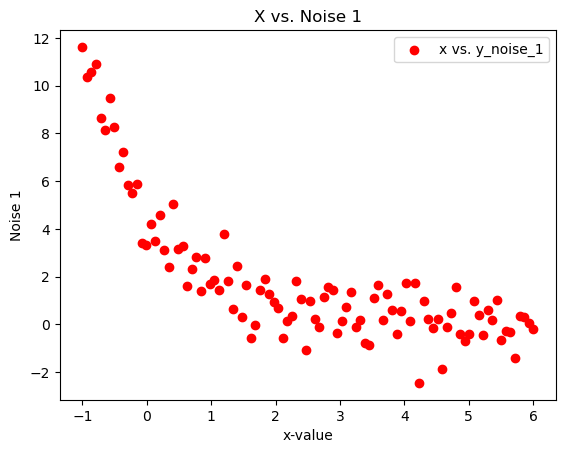

In [2]:
x = df['x']
y_1 = df['y_noise_1']
plt.scatter(x, y_1, color = 'red', label = "x vs. y_noise_1")
plt.xlabel("x-value")
plt.ylabel("Noise 1")
plt.title("X vs. Noise 1")
plt.legend()
plt.show()

Fit: y = 4.71 * e^(-0.92 * x)


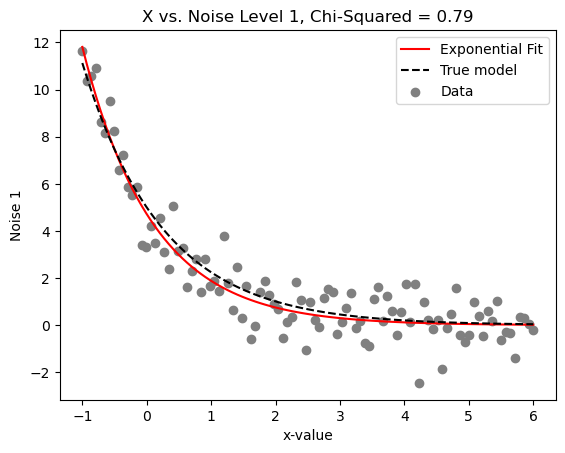

In [3]:
def model (x, A, k):
    return A * np.exp(-k * x)

p0 = [1, 1]
popt, pcov = curve_fit(model, x, y_1, p0 = p0)
A_fit, k_fit = popt
fit_line = model(x, A_fit, k_fit)


residuals = y_1 - model(x, A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(x) - len(popt)
chi2_reduced = chi2 / dof
true_model = model(x, 5, 0.8)

def plot_fit(x, y_1, chi2_reduced):
    print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")
    plt.plot(x, fit_line, 'r', label = "Exponential Fit")
    plt.plot(x, true_model, color = 'black', linestyle = "--", label = "True model")
    plt.scatter(x, y_1, color = 'grey', label = "Data")
    plt.xlabel("x-value")
    plt.ylabel("Noise 1")
    plt.title(f"X vs. Noise Level 1, Chi-Squared = {chi2_reduced:.2f}")
    plt.legend()
    plt.show()

plot_fit(x = x, y_1 = y_1, chi2_reduced = chi2_reduced)



[<Axes: > <Axes: > <Axes: > <Axes: >]


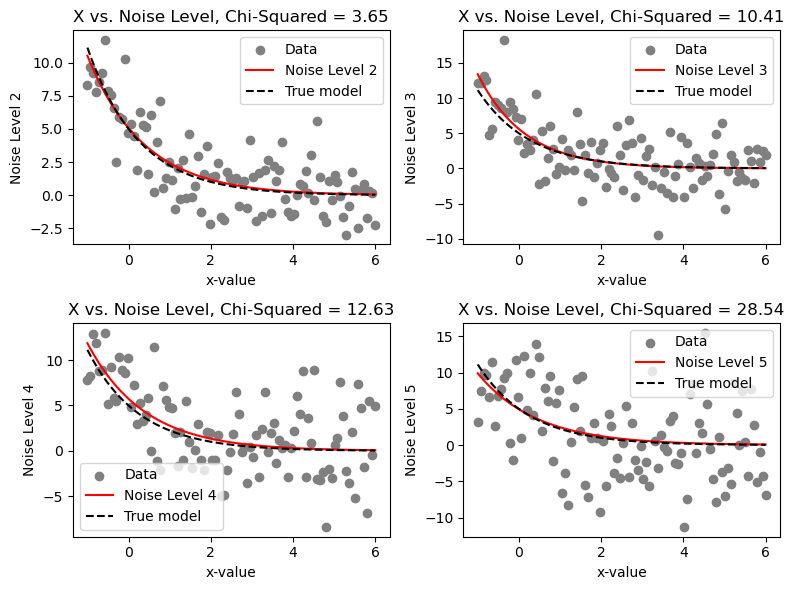

In [4]:
p0 = [1,1]
def fit_model(x, y):
    popt, pcov = curve_fit(model, x, y, p0 = p0)
    A_fit, k_fit = popt
    residuals = y - model(x, A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(x) - len(popt)
    chi2_red = chi2 / dof
    return(A_fit, k_fit, chi2_red)

fig, axs = plt.subplots(2, 2, figsize = (8,6))
axs = np.array(axs).flatten()
print(axs)
zipped_columns = [df['y_noise_2'], df['y_noise_3'], df['y_noise_4'], df['y_noise_5']]
labels = ["Noise Level 2", "Noise Level 3", "Noise Level 4", "Noise Level 5"]

for i in range(4):
    y = zipped_columns[i]
    axi = axs[i]
    
    A_fit, k_fit, chi2_red = fit_model(x, y)
    fit_line = model(x, A_fit, k_fit)
    true_model = model(x, 5, 0.8)

    axi.scatter(x, y, color = 'grey', label = "Data")
    axi.plot(x, fit_line, 'r', label = labels[i])
    axi.plot(x, true_model, color = 'black', linestyle = "--", label = "True model")
    
    axi.set_xlabel("x-value")
    axi.set_ylabel(labels[i])
    axi.set_title(f"X vs. Noise Level, Chi-Squared = {chi2_red:.2f}")
    axi.legend()

plt.tight_layout()
plt.show()
    
#With each increase in the noise level, both the red and black dotted lines seem to level out and become more flat, because the data involved is 
#much more spread out. This makes the line of best fit, AKA the line that we try to plot in each subplot, more and more flat as it has less of a specific direction or proportionality

#With each increase in the noise level, the reduced Chi-Squared becomes larger and larger, showing the the distance between the average dot and the line
#of best fit is getting larger and larger

In [8]:
data = {
    'Noise Level': ['y_noise_1','y_noise_2','y_noise_3','y_noise_4','y_noise_5'],
    'A fit': ['A1','A2','A3','A4','A5'],
    'k fit': ['k1','k2','k3','k4','k5'],
    'Reduced chi-squared': ['chi_red_1','chi_red_2','chi_red_3','chi_red_4','chi_red_5']
}

data_frame = pd.DataFrame(data)

data_frame.to_csv("noisy_parameters.csv", index=False)

